<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Advanced_ML_AI/Clase_01_Modelos_Avanzados_%C3%81rboles/01A_%7C_Ejercicio_Coches_y_Casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 INTRODUCCIÓN
En este Notebook trataremos dos ejercicios como modo de afianzar los conceptos sobre árboles decisión y modelos de ensamble de árboles de decisión.


*   EJERCICIO PRECIO COCHES
*   EJERCICIO PRECIO CASAS



Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1F68d62Vskya9lSi8nwJfQxRqMqdVk3_I0c61jgtSWWg/edit?usp=sharing)
*   [Enlace a este notebook](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Arboles/Clase_02_Arboles/03E_%7C_Ejercicio_Precio_Coches.ipynb)


## 0101 Import
Puedes importar aquí las librerías que creas que vas a necesitar.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn import ensemble

## 0102 Carga el dataset del precio de coches
Aquí teneis el url del archivo raw del dataset sobre el precio de diversos coches de segunda mano. 

https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/coches_usados_esp.csv 

Importa los datos en un dataframe llamado **dataframe df_coches**.

In [4]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/coches_usados_esp.csv'

# Importa csv
df_coches = pd.read_csv(url, sep=';')

# Visualización primeras filas
df_coches.head()

,ID,make,model,version,months_old,power,sale_type,num_owners,gear_type,fuel_type,kms,price
0,97860,Porsche,911,Carrera 4 S Coup�,240.0,210.0,classic,3.0,manual,gasoline,202000.0,999999
1,27821,Ford,Mustang,Gt500 Cabrio Vendido,54.0,487.0,used,1.0,manual,gasoline,30000.0,685000
2,97801,Porsche,911,3.3 Turbo Targa (Precio A Consultar),358.0,220.0,used,NaN,manual,gasoline,56300.0,555555
3,98251,Porsche,911,R Unidad 343 De 991-Iva Deducible,14.0,368.0,used,1.0,manual,gasoline,2800.0,470000
4,98250,Porsche,911,Gt2 Rs,3.0,515.0,used,NaN,NaN,gasoline,10.0,450000


## 0103 Carga el dataset del precio de casas
Aquí teneis el url del archivo raw del dataset sobre el precio de diversas venta de casas en el condado de King County en USA. 

https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/kc_house_data.csv

Importa los datos en un dataframe llamado **dataframe df_casas**.

In [6]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/kc_house_data.csv'

# Importa csv
df_casas = pd.read_csv(url, sep=',')

# Visualización primeras filas
df_casas.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 02 EDA
Para familiarizarte con los datos puedes realizar un pequeño análisis exploratorio visual. Puedes usar los métodos .shape, .info(), .describe(), por ejemplo para entender su tamaño y sus variables. 

Recuerda que puedes encontrar mis clases sobre análisis exploratorio [aquí](https://github.com/JotaBlanco/TheValley/tree/main/EDA/).

## 0201 EDA COCHES

In [7]:
df_coches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93991 entries, 0 to 93990
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          93991 non-null  int64  
 1   make        93991 non-null  object 
 2   model       93991 non-null  object 
 3   version     93991 non-null  object 
 4   months_old  93717 non-null  float64
 5   power       93504 non-null  float64
 6   sale_type   93979 non-null  object 
 7   num_owners  22660 non-null  float64
 8   gear_type   92710 non-null  object 
 9   fuel_type   93926 non-null  object 
 10  kms         93127 non-null  float64
 11  price       93991 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 8.6+ MB


In [8]:
df_coches.describe()

,ID,months_old,power,num_owners,kms,price
count,93991.00000,93717.000000,93504.000000,22660.000000,93127.000000,93991.000000
mean,55100.87935,63.094775,99.729477,1.055119,82702.565250,16587.291379
std,33119.32602,56.837686,42.698809,0.277124,75186.697789,15563.712383
min,25.00000,1.000000,0.000000,1.000000,0.000000,200.000000
25%,25452.50000,16.000000,77.000000,1.000000,18300.000000,8500.000000
50%,53896.00000,46.000000,88.000000,1.000000,66000.000000,13490.000000
75%,83573.50000,96.000000,110.000000,1.000000,129000.000000,19999.000000
max,113143.00000,374.000000,809.000000,11.000000,497000.000000,999999.000000


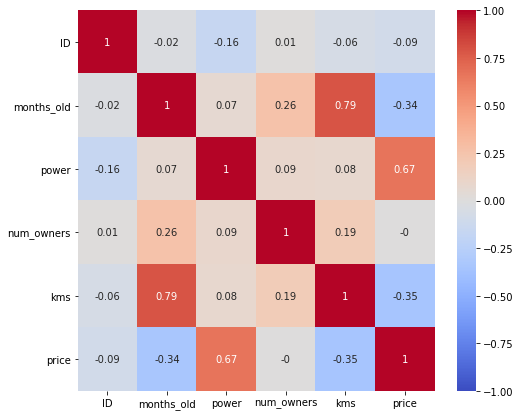

In [9]:
# Visualización coeficientes Pearson
plt.figure(figsize=(8,7))
sns.heatmap(np.round(df_coches.corr(),2), 
            vmin=-1, vmax=1, 
            annot=True, cmap="coolwarm")
plt.show()

## 0202 EDA CASAS
[Aquí](https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/207885) más información sobre qué significa cada variable.

In [10]:
df_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
df_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


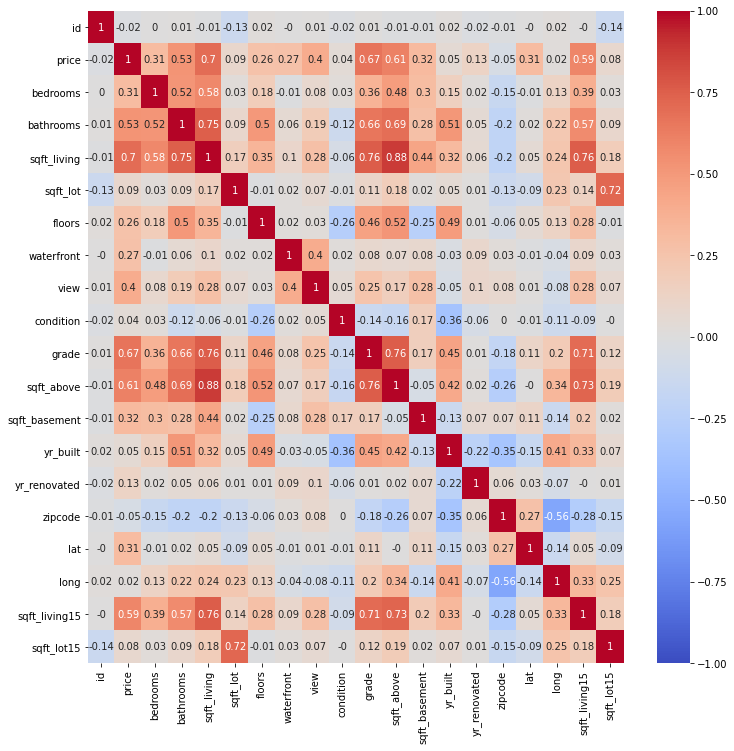

In [14]:
# Visualización coeficientes Pearson
plt.figure(figsize=(12,12))
sns.heatmap(np.round(df_casas.corr(),2), 
            vmin=-1, vmax=1, 
            annot=True, cmap="coolwarm")
plt.show()

# 03 Preparación de los datos
Normalmente el dataframe contiene nulos, así como variables categóricas y presencia de ciertas variables que probablemente no queramos usar. 

Necesitamos limpiarlo antes de poder entrenar los modelos.

## 0301 DATASET COCHES: Preparación de los datos

### 030101 Variables Útiles
De entre las variables disponibles, quedémonos con la que queramos utilizar como predictoras para el estudio.

In [15]:
df_coches.head()

,ID,make,model,version,months_old,power,sale_type,num_owners,gear_type,fuel_type,kms,price
0,97860,Porsche,911,Carrera 4 S Coup�,240.0,210.0,classic,3.0,manual,gasoline,202000.0,999999
1,27821,Ford,Mustang,Gt500 Cabrio Vendido,54.0,487.0,used,1.0,manual,gasoline,30000.0,685000
2,97801,Porsche,911,3.3 Turbo Targa (Precio A Consultar),358.0,220.0,used,NaN,manual,gasoline,56300.0,555555
3,98251,Porsche,911,R Unidad 343 De 991-Iva Deducible,14.0,368.0,used,1.0,manual,gasoline,2800.0,470000
4,98250,Porsche,911,Gt2 Rs,3.0,515.0,used,NaN,NaN,gasoline,10.0,450000


In [16]:
df_coches.columns

Index(['ID', 'make', 'model', 'version', 'months_old', 'power', 'sale_type',
       'num_owners', 'gear_type', 'fuel_type', 'kms', 'price'],
      dtype='object')

In [17]:
cols = ['make', 'model', 'months_old', 'power', 'sale_type',
       'num_owners', 'gear_type', 'fuel_type', 'kms', 'price']

cat_cols = ['make', 'model', 'sale_type', 'gear_type', 'fuel_type']

In [18]:
df_coches = df_coches[cols]
df_coches.head()

,make,model,months_old,power,sale_type,num_owners,gear_type,fuel_type,kms,price
0,Porsche,911,240.0,210.0,classic,3.0,manual,gasoline,202000.0,999999
1,Ford,Mustang,54.0,487.0,used,1.0,manual,gasoline,30000.0,685000
2,Porsche,911,358.0,220.0,used,NaN,manual,gasoline,56300.0,555555
3,Porsche,911,14.0,368.0,used,1.0,manual,gasoline,2800.0,470000
4,Porsche,911,3.0,515.0,used,NaN,NaN,gasoline,10.0,450000


### 030102 Dumificación de variables categóricas
Recuerda que debemos transformar las variables categóricas para convertirlas en numéricas.

In [19]:
df_coches = pd.get_dummies(df_coches[cols], 
                           prefix_sep='_',
                           drop_first=True, 
                           columns=cat_cols)

display(len(df_coches))
df_coches.head()

93991

,months_old,power,num_owners,kms,price,make_Audi,make_Bentley,make_Bmw,make_Chevrolet,make_Chrysler,make_Citroen,make_Dacia,make_Ds,make_Fiat,make_Ford,make_Honda,make_Hyundai,make_Iveco,make_Jaguar,make_Jeep,make_Kia,make_Land,make_Mazda,make_Mercedes-Benz,make_Mini,make_Mitsubishi,make_Nissan,make_Opel,make_Peugeot,make_Porsche,make_Renault,make_Saab,make_Seat,make_Skoda,make_Smart,make_Ssangyong,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo,...,model_V220,model_V40,model_V40Cc,model_V60,model_Vectra,model_Verso,model_Viano,model_Vito,model_Vivaro,model_Voyager,model_Wrangler,model_X-Trail,model_X1,model_X3,model_X4,model_X5,model_X6,model_Xc60,model_Xc90,model_Xe,model_Xf,model_Xsara,model_XsaraPicasso,model_Yaris,model_Z4,model_Zafira,model_ZafiraTourer,sale_type_classic,sale_type_demo,sale_type_km_0,sale_type_new,sale_type_used,gear_type_manual,gear_type_semi-automatic,fuel_type_LPG,fuel_type_diesel,fuel_type_electric,fuel_type_etanol,fuel_type_gasoline,fuel_type_hybrid
0,240.0,210.0,3.0,202000.0,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,54.0,487.0,1.0,30000.0,685000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,358.0,220.0,NaN,56300.0,555555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
3,14.0,368.0,1.0,2800.0,470000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
4,3.0,515.0,NaN,10.0,450000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


### 030103 Limpieza de nulos
Con la dumificación hemos eliminado los nulos en las columnas categóricas sin deshacernos de las filas. Queda algún nulo en las variables numéricas? 

Recuerda que puedes mirarlo con dataframe.isna().sum() y si sí hay nulos, puedes rellenarlos con el método .fillna().

In [20]:
# Rellenamos los nulos de las variables numéricas
df_coches[['months_old', 'power', 'num_owners', 'kms', 'price']].isna().sum()

months_old      274
power           487
num_owners    71331
kms             864
price             0
dtype: int64

In [21]:
# Hay muchos nulos en num_owners
# Quizás esto tiene que ver con origenes del coche desconocidos?
# Vamos a limpiar la variable en 1, 2, 3+, nulo y la utilizamos como categórica
filtro_muchos_owners = df_coches['num_owners']>=3
df_coches.loc[filtro_muchos_owners, 'num_owners'] = '3+'
df_coches = pd.get_dummies(df_coches, prefix_sep='_', 
                   dummy_na=True,
                   drop_first=True, 
                   columns=['num_owners'])
df_coches.head()

,months_old,power,kms,price,make_Audi,make_Bentley,make_Bmw,make_Chevrolet,make_Chrysler,make_Citroen,make_Dacia,make_Ds,make_Fiat,make_Ford,make_Honda,make_Hyundai,make_Iveco,make_Jaguar,make_Jeep,make_Kia,make_Land,make_Mazda,make_Mercedes-Benz,make_Mini,make_Mitsubishi,make_Nissan,make_Opel,make_Peugeot,make_Porsche,make_Renault,make_Saab,make_Seat,make_Skoda,make_Smart,make_Ssangyong,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo,model_118,...,model_V60,model_Vectra,model_Verso,model_Viano,model_Vito,model_Vivaro,model_Voyager,model_Wrangler,model_X-Trail,model_X1,model_X3,model_X4,model_X5,model_X6,model_Xc60,model_Xc90,model_Xe,model_Xf,model_Xsara,model_XsaraPicasso,model_Yaris,model_Z4,model_Zafira,model_ZafiraTourer,sale_type_classic,sale_type_demo,sale_type_km_0,sale_type_new,sale_type_used,gear_type_manual,gear_type_semi-automatic,fuel_type_LPG,fuel_type_diesel,fuel_type_electric,fuel_type_etanol,fuel_type_gasoline,fuel_type_hybrid,num_owners_2.0,num_owners_3+,num_owners_nan
0,240.0,210.0,202000.0,999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,54.0,487.0,30000.0,685000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
2,358.0,220.0,56300.0,555555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
3,14.0,368.0,2800.0,470000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
4,3.0,515.0,10.0,450000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [22]:
df_coches[['months_old', 'power', 'kms', 'price']].isna().sum()

months_old    274
power         487
kms           864
price           0
dtype: int64

In [23]:
for col in ['months_old', 'power', 'kms']:
  df_coches[col] = df_coches[col].fillna(df_coches[col].median())

In [24]:
df_coches.isna().sum()

months_old            0
power                 0
kms                   0
price                 0
make_Audi             0
                     ..
fuel_type_gasoline    0
fuel_type_hybrid      0
num_owners_2.0        0
num_owners_3+         0
num_owners_nan        0
Length: 301, dtype: int64

## 0302 DATASET CASAS: Preparación de los datos

### 030201 Crea una nueva variable
Crea la variable "year" de manera que indique el año en que se ha vendido la casa.

In [30]:
# Creamos la variable año, por ejemplo, con una list comprehension
df_casas['year'] = [int(row[:4]) for row in df_casas['date']]

### 030202 Variables Útiles
De entre las variables disponibles, quedémonos con la que queramos utilizar como predictoras para el estudio.

In [31]:
df_casas.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [32]:
df_casas.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year'],
      dtype='object')

In [33]:
cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year',
        'price']


In [35]:
df_casas = df_casas[cols]
df_casas.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,510000.0


# 04 Train - test split
Separamos el set de datos en dos utilizando [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

## 0401 DATASET COCHES: Train - test

In [37]:
# Primero generamos la matriz X con las variables predictoras 
# y el vector y con la variable a predecir
X_CO = df_coches.drop('price',axis=1)
y_CO = df_coches['price']

# Comprueba sus tamaños
X_CO.shape, y_CO.shape

((93991, 300), (93991,))

In [38]:
# Haz la partición train-test
X_CO_train, X_CO_test, y_CO_train, y_CO_test = train_test_split(X_CO, 
                                                                y_CO,
                                                                test_size=0.33, 
                                                                random_state=42)

# Comprueba sus tamaños
X_CO_train.shape, X_CO_test.shape, y_CO_train.shape, y_CO_test.shape

((62973, 300), (31018, 300), (62973,), (31018,))

## 0402 DATASET CASAS: Train - test

In [41]:
# Primero generamos la matriz X con las variables predictoras 
# y el vector y con la variable a predecir
X_CA = df_coches.drop('price',axis=1)
y_CA = df_coches['price']

# Comprueba sus tamaños
X_CA.shape, y_CA.shape

((93991, 300), (93991,))

In [42]:
# Haz la partición train-test
X_CA_train, X_CA_test, y_CA_train, y_CA_test = train_test_split(X_CA, 
                                                                y_CA,
                                                                test_size=0.33, 
                                                                random_state=42)

# Comprueba sus tamaños
X_CA_train.shape, X_CA_test.shape, y_CA_train.shape, y_CA_test.shape

((62973, 300), (31018, 300), (62973,), (31018,))

# 05 Entrena tus modelos
Entrena distintos modelos basados en árboles (Árbol de Decisión, Random Forest y Gradient Boosting) optimizando el equilibrio bias-variance y selecciona el mejor.

In [ ]:
def entrenar_modelo_y_predecir(modelo):
  # Entreno el árbol con el set de entrenamiento
  modelo = modelo.fit(X=X_train, y=y_train)
  # Uso el árbol para predecir sobre el dataset de entrenamiento
  y_pred_train = modelo.predict(X_train)
  # Uso el árbol para predecir sobre el dataset de test
  y_pred_test = modelo.predict(X_test)
  # Calidad predicción train
  rmse_train = round(mean_squared_error(y_train, y_pred_train, squared=False), 2)
  print('RMSE en set de entrenamiento :', rmse_train)
  # Calidad predicción test
  rmse_test = round(mean_squared_error(y_test, y_pred_test, squared=False), 2)
  print('RMSE en set de test :', rmse_test)
  # Degradación de la predicción
  print('Degradación: ' + str(round((rmse_test-rmse_train)/rmse_train*100,2)) + '%')

## 0501 Árbol de Decisión

In [ ]:
# Define el árbol
modelo_arbol = tree.DecisionTreeRegressor(
    max_depth=50, 
    min_samples_split = 10,
    min_samples_leaf = 5)

# Entrena y evalúa el árbol
entrenar_modelo_y_predecir(modelo_arbol)

RMSE en set de entrenamiento : 5555.82
RMSE en set de test : 5813.18
Degradación: 4.63%


## 0502 Random Forest

In [ ]:
# Define el modelo de Random Forest
modelo_RF = ensemble.RandomForestRegressor(
    n_estimators = 100,
    max_features = "auto",
    max_depth = 10, 
    min_samples_split = 10,
    min_samples_leaf = 5)

# Entrena y evalúa el modelo
entrenar_modelo_y_predecir(modelo_RF)

RMSE en set de entrenamiento : 6166.05
RMSE en set de test : 5365.07
Degradación: -12.99%


In [ ]:
# Define el modelo de Random Forest
modelo_RF = ensemble.RandomForestRegressor(
    n_estimators = 200,
    max_features = "auto",
    max_depth = 10, 
    min_samples_split = 10,
    min_samples_leaf = 5)

# Entrena y evalúa el modelo
entrenar_modelo_y_predecir(modelo_RF)

RMSE en set de entrenamiento : 6136.03
RMSE en set de test : 5320.63
Degradación: -13.29%


In [ ]:
# Define el modelo de Random Forest
modelo_RF = ensemble.RandomForestRegressor(
    n_estimators = 500,
    max_features = "auto",
    max_depth = 15, 
    min_samples_split = 10,
    min_samples_leaf = 5)

# Entrena y evalúa el modelo
entrenar_modelo_y_predecir(modelo_RF)

RMSE en set de entrenamiento : 5787.67
RMSE en set de test : 5052.98
Degradación: -12.69%


## 0503 Gradient Boosting

In [ ]:
modelo_GB = ensemble.GradientBoostingRegressor(
    n_estimators = 200, 
    learning_rate = 0.01,
    max_depth = 8, 
    min_samples_split = 10,
    min_samples_leaf = 5)

# Entrenamos y predecimos con dicho modelo
entrenar_modelo_y_predecir(modelo_GB)

RMSE en set de entrenamiento : 5969.58
RMSE en set de test : 5562.84
Degradación: -6.81%
